# Plots for the paper

In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

### Error analysis for brownian motion

In [2]:
error_bm_df = pd.read_csv('results/error_brownian_64bit.csv')

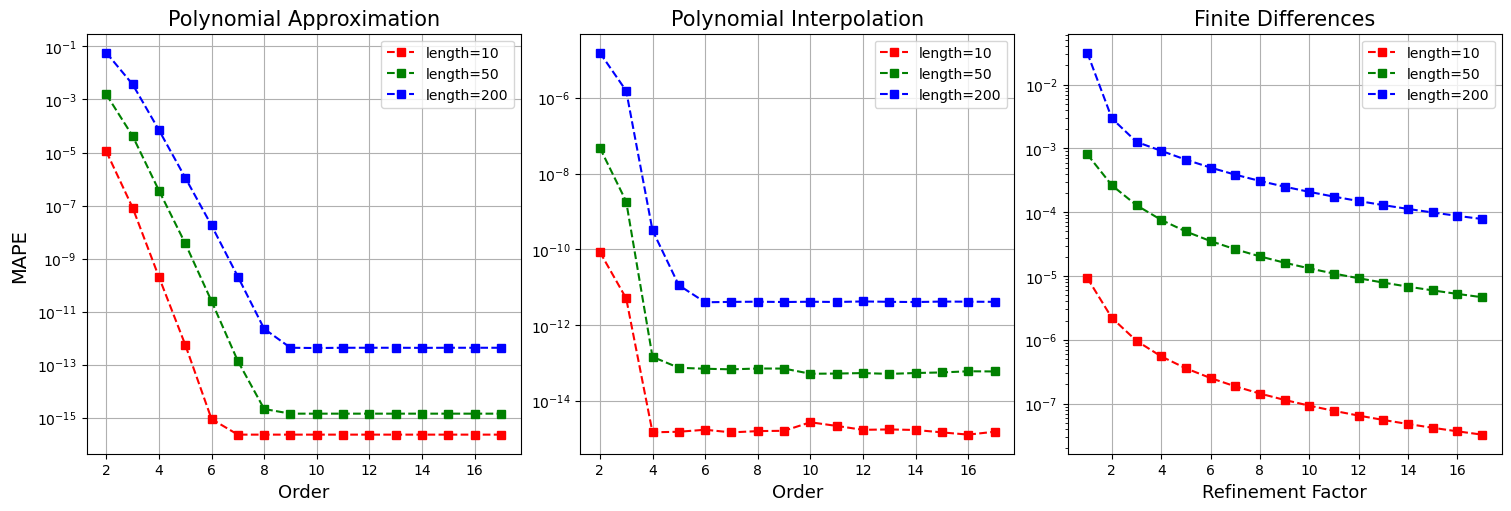

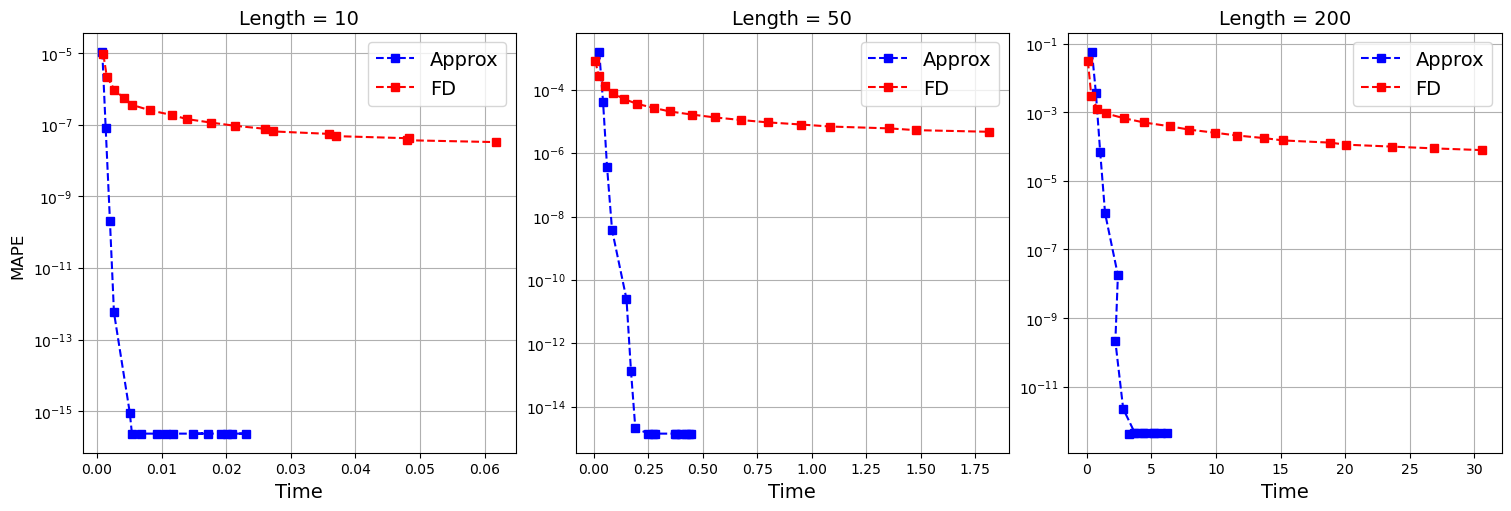

In [3]:
models = ['monomial_approx', 'monomial_interp', 'sigkerax']
names = ['Polynomial Approximation', 'Polynomial Interpolation', 'Finite Differences']
colors = ['r', 'g', 'b']
lengths = [10, 50, 200] 
dims = [2, 3]

# Set dimension = 2 (experiments have been run also for dim = 3)
sub_df = error_bm_df[error_bm_df.dim == 2]

# Plotting the MAPE vs order / refinement factor for each model

fig, ax = plt.subplots(1, len(models), figsize=(15, 5), constrained_layout=True)


for i, (name, model) in enumerate(zip(names, models)):
    for color, length in zip(colors[:len(lengths)],lengths):
        
        ax[i].plot(sub_df[sub_df.model == model][sub_df.length == length].level, 
                   sub_df[sub_df.model == model][sub_df.length == length].mape, 
                   label=f'length={length}', linestyle='--', color=color, marker='s')
        ax[i].set_title(name, fontsize=15)
        ax[i].grid(True)
        ax[i].set_yscale('log')

        if name == 'Finite Differences':
            ax[i].set_xlabel('Refinement Factor', fontsize=13)
        else:
            ax[i].set_xlabel('Order', fontsize=13)
        
        ax[i].legend()

fig.supylabel('MAPE', fontsize=14)
plt.show()


# Same thing but avoid monomial interpolation
models = ['monomial_approx', 'sigkerax',]
names = ['Length = 10', 'Length = 50', 'Length = 200']
model_names = ['Approx', 'FD']
colors = ['b', 'r', 'g']
lengths = [10, 50, 200]
dims = [2,3]

fig, ax = plt.subplots(1, len(lengths), figsize=(15, 5), constrained_layout=True)

sub_df = error_bm_df[error_bm_df.dim == 2]

for i, (name, length) in enumerate(zip(names, lengths)):
    for model_name, (color, model) in zip(model_names, zip(colors[:len(models)],models)):
        
        ax[i].plot(sub_df[sub_df.model == model][sub_df.length == length].time, 
                   sub_df[sub_df.model == model][sub_df.length == length].mape, 
                   label=model_name, linestyle='--', color=color, marker='s')
        ax[i].set_title(name, fontsize=14)
        ax[i].grid(True)
        ax[i].set_yscale('log')
        ax[i].set_xlabel('Time', fontsize=14)
        ax[i].legend(fontsize=14)

fig.supylabel('MAPE', fontsize=12)
plt.show()

In [7]:
error_bm_df[error_bm_df.dim == 2][error_bm_df.model == 'monomial_approx'][error_bm_df.length == 200]

,model,device,dtype,batch_size,length,dim,level,benchmark_level,mae,mape,rmse,time
294,monomial_approx,cpu,float64,4,200,2,2,21,2.669795e+01,3.766298e+01,2.838039e+02,0.105790
295,monomial_approx,cpu,float64,4,200,2,3,21,1.197308e+00,1.867001e+00,1.252181e+01,0.378928
296,monomial_approx,cpu,float64,4,200,2,4,21,5.955703e-02,7.482268e-02,5.587165e-01,0.501820
297,monomial_approx,cpu,float64,4,200,2,5,21,1.069493e-03,1.472124e-03,1.094712e-02,0.764609
298,monomial_approx,cpu,float64,4,200,2,6,21,3.031891e-05,3.708356e-05,2.502386e-04,0.962037
299,monomial_approx,cpu,float64,4,200,2,7,21,2.662576e-07,3.418520e-07,2.208439e-06,1.128490
300,monomial_approx,cpu,float64,4,200,2,8,21,5.740091e-09,6.997670e-09,3.574750e-08,1.355149
301,monomial_approx,cpu,float64,4,200,2,9,21,1.493832e-09,1.762388e-09,1.337228e-08,1.455318
302,monomial_approx,cpu,float64,4,200,2,10,21,1.501113e-09,1.766822e-09,1.340532e-08,1.899261
303,monomial_approx,cpu,float64,4,200,2,11,21,1.501569e-09,1.767067e-09,1.340561e-08,2.098588


### Error analysis for sin and cos experiment (in appendix of the paper) 

In [4]:
error_bm_df = pd.read_csv('results/error_sincos.csv')

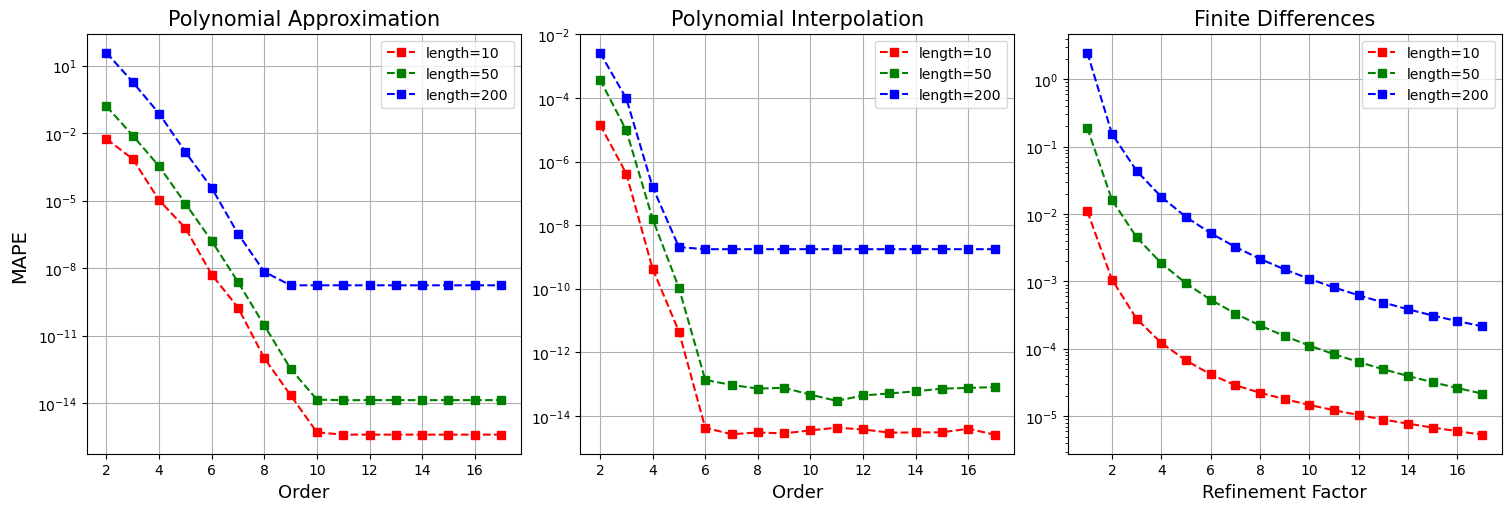

In [5]:
models = ['monomial_approx', 'monomial_interp', 'sigkerax']
names = ['Polynomial Approximation', 'Polynomial Interpolation', 'Finite Differences']
colors = ['r', 'g', 'b']
lengths = [10, 50, 200] 
dims = [2, 3]

# Set dimension = 2 (experiments have been run also for dim = 3)
sub_df = error_bm_df[error_bm_df.dim == 2]

# Plotting the MAPE vs order / refinement factor for each model
fig, ax = plt.subplots(1, len(models), figsize=(15, 5), constrained_layout=True)

for i, (name, model) in enumerate(zip(names, models)):
    for color, length in zip(colors[:len(lengths)],lengths):
        
        ax[i].plot(sub_df[sub_df.model == model][sub_df.length == length].level, 
                   sub_df[sub_df.model == model][sub_df.length == length].mape, 
                   label=f'length={length}', linestyle='--', color=color, marker='s')
        ax[i].set_title(name, fontsize=15)
        ax[i].grid(True)
        ax[i].set_yscale('log')

        if name == 'Finite Differences':
            ax[i].set_xlabel('Refinement Factor', fontsize=13)
        else:
            ax[i].set_xlabel('Order', fontsize=13)
        
        ax[i].legend()

fig.supylabel('MAPE', fontsize=14)
plt.show()

### Time analysis

In [6]:
df = pd.read_csv('results/time_approx.csv')

gpu_length = df[df.analysis == 'length'][df.device == 'gpu']
cpu_length = df[df.analysis == 'length'][df.device == 'cpu']

gpu_order = df[df.analysis == 'order'][df.device == 'gpu']
cpu_order = df[df.analysis == 'order'][df.device == 'cpu']

gpu_dim = df[df.analysis == 'dim'][df.device == 'gpu']
cpu_dim = df[df.analysis == 'dim'][df.device == 'cpu']

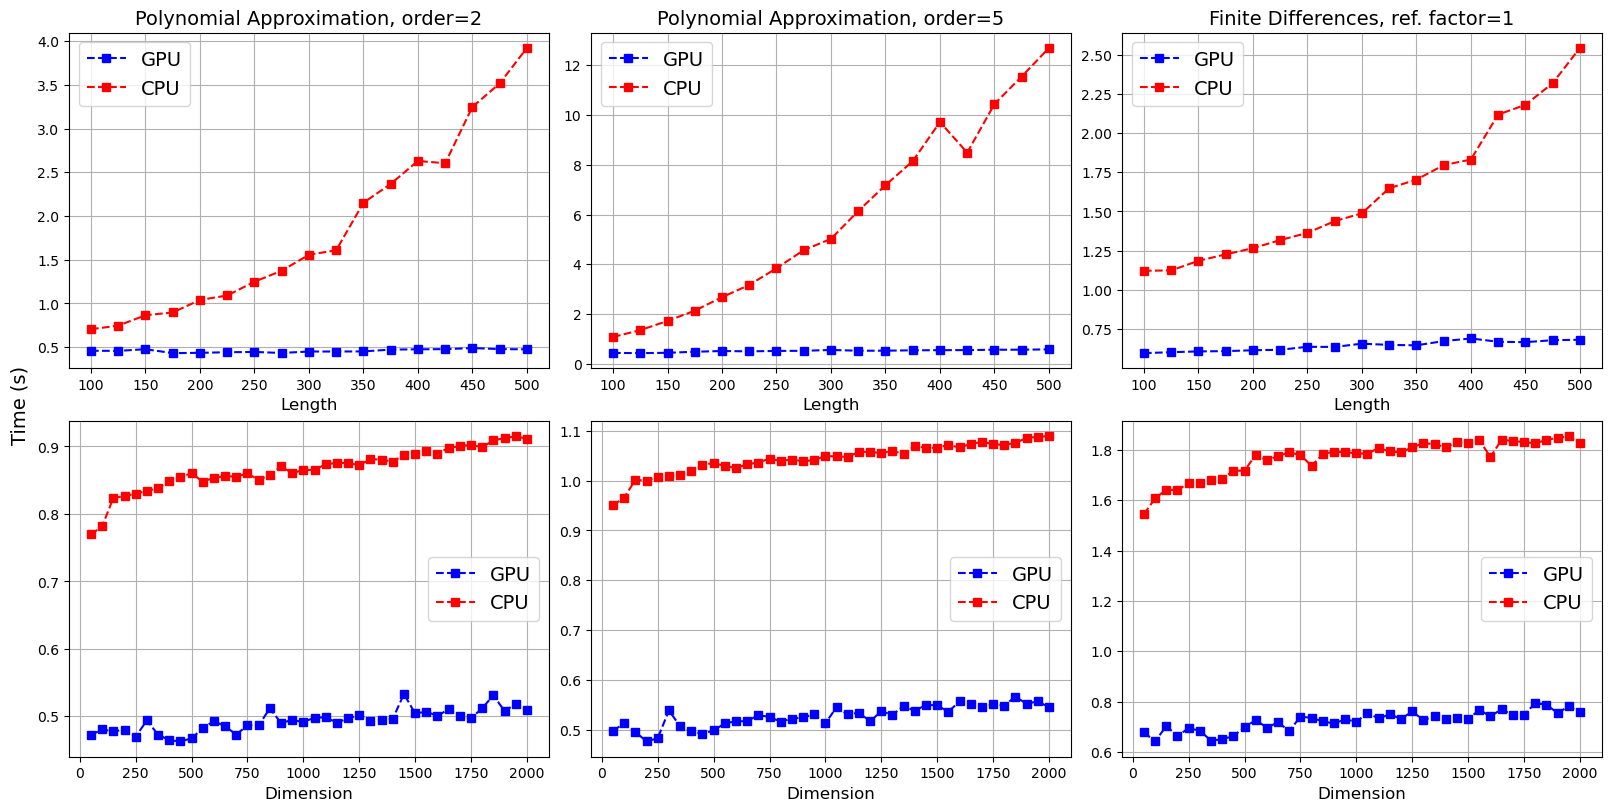

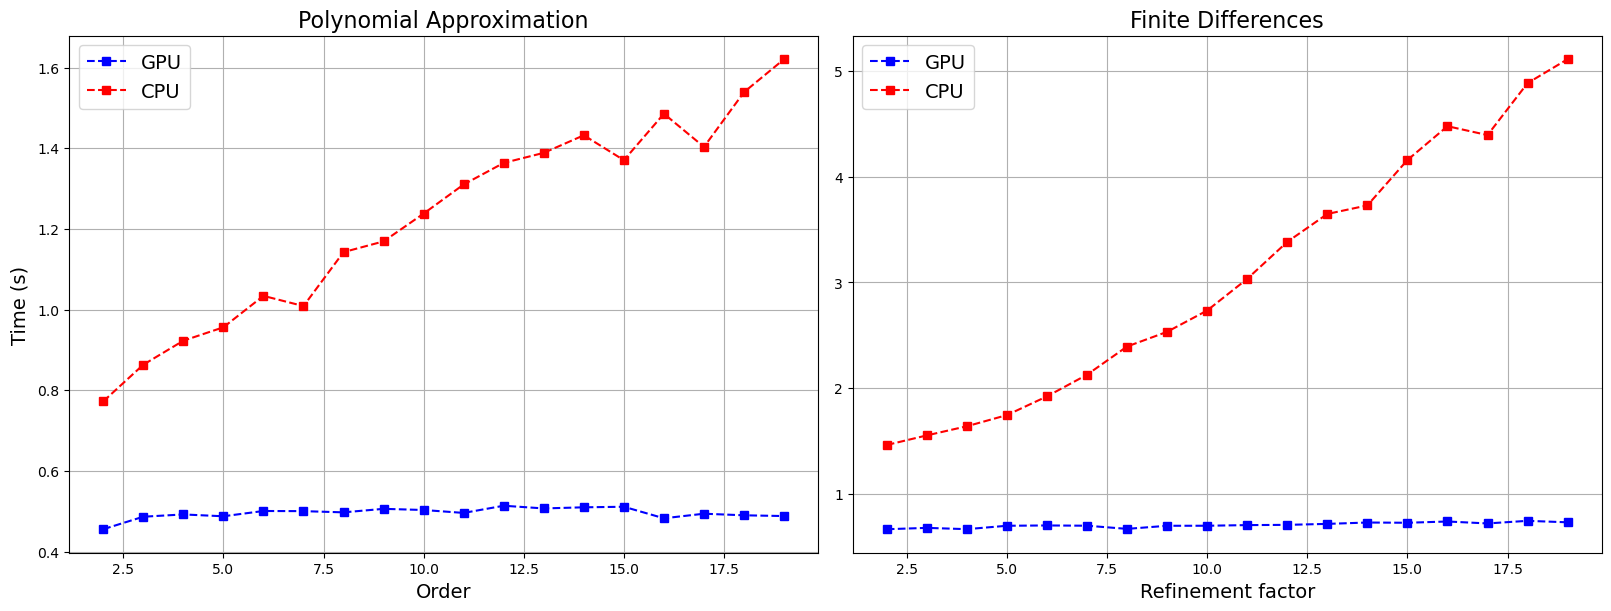

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), constrained_layout=True)

ax[0][0].plot(gpu_length[gpu_length.model == 'monomial_approx'][gpu_length.param == 2].length,
           gpu_length[gpu_length.model == 'monomial_approx'][gpu_length.param == 2].time,
            color='blue', label='GPU', linestyle='--', marker='s')

ax[0][0].plot(cpu_length[cpu_length.model == 'monomial_approx'][cpu_length.param == 2].length,
           cpu_length[cpu_length.model == 'monomial_approx'][cpu_length.param == 2].time,
            color='red', label='CPU', linestyle='--', marker='s')

ax[0][1].plot(gpu_length[gpu_length.model == 'monomial_approx'][gpu_length.param == 5].length,
           gpu_length[gpu_length.model == 'monomial_approx'][gpu_length.param == 5].time,
            color='blue', label='GPU', linestyle='--', marker='s')

ax[0][1].plot(cpu_length[cpu_length.model == 'monomial_approx'][cpu_length.param == 5].length,
           cpu_length[cpu_length.model == 'monomial_approx'][cpu_length.param == 5].time,
            color='red', label='CPU', linestyle='--', marker='s')

ax[0][2].plot(gpu_length[gpu_length.model == 'sigkerax'][gpu_length.param == 1].length,
           gpu_length[gpu_length.model == 'sigkerax'][gpu_length.param == 1].time,
            color='blue', label='GPU', linestyle='--', marker='s')

ax[0][2].plot(cpu_length[cpu_length.model == 'sigkerax'][cpu_length.param == 1].length,
           cpu_length[cpu_length.model == 'sigkerax'][cpu_length.param == 1].time,
            color='red', label='CPU', linestyle='--', marker='s')

ax[0][0].grid()
ax[0][1].grid()
ax[0][2].grid()
ax[0][0].set_title('Polynomial Approximation, order=2', fontsize=14)
ax[0][1].set_title('Polynomial Approximation, order=5', fontsize=14)
ax[0][2].set_title('Finite Differences, ref. factor=1', fontsize=14)
ax[0][0].set_xlabel('Length', fontsize=12)
ax[0][1].set_xlabel('Length', fontsize=12)
ax[0][2].set_xlabel('Length', fontsize=12)
ax[0][0].legend(fontsize=14)
ax[0][1].legend(fontsize=14)
ax[0][2].legend(fontsize=14)

ax[1][0].plot(gpu_dim[gpu_dim.model == 'monomial_approx'][gpu_dim.param == 2].dim,
           gpu_dim[gpu_dim.model == 'monomial_approx'][gpu_dim.param == 2].time,
            color='blue', label='GPU', linestyle='--', marker='s')

ax[1][0].plot(cpu_dim[cpu_dim.model == 'monomial_approx'][cpu_dim.param == 2].dim,
           cpu_dim[cpu_dim.model == 'monomial_approx'][cpu_dim.param == 2].time,
            color='red', label='CPU', linestyle='--', marker='s')

ax[1][1].plot(gpu_dim[gpu_dim.model == 'monomial_approx'][gpu_dim.param == 5].dim,
           gpu_dim[gpu_dim.model == 'monomial_approx'][gpu_dim.param == 5].time,
            color='blue', label='GPU', linestyle='--', marker='s')

ax[1][1].plot(cpu_dim[cpu_dim.model == 'monomial_approx'][cpu_dim.param == 5].dim,
           cpu_dim[cpu_dim.model == 'monomial_approx'][cpu_dim.param == 5].time,
            color='red', label='CPU', linestyle='--', marker='s')

ax[1][2].plot(gpu_dim[gpu_dim.model == 'sigkerax'][gpu_dim.param == 1].dim,
           gpu_dim[gpu_dim.model == 'sigkerax'][gpu_dim.param == 1].time,
            color='blue', label='GPU', linestyle='--', marker='s')

ax[1][2].plot(cpu_dim[cpu_dim.model == 'sigkerax'][cpu_dim.param == 1].dim,
           cpu_dim[cpu_dim.model == 'sigkerax'][cpu_dim.param == 1].time,
            color='red', label='CPU', linestyle='--', marker='s')

ax[1][0].grid()
ax[1][1].grid()
ax[1][2].grid()
ax[1][0].set_xlabel('Dimension', fontsize=12)
ax[1][1].set_xlabel('Dimension', fontsize=12)
ax[1][2].set_xlabel('Dimension', fontsize=12)
ax[1][0].legend(fontsize=14)
ax[1][1].legend(fontsize=14)
ax[1][2].legend(fontsize=14)


fig.supylabel('Time (s)', fontsize=14)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

ax[0].plot(gpu_order[gpu_order.model == 'monomial_approx'].param,
           gpu_order[gpu_order.model == 'monomial_approx'].time,
            color='blue', label='GPU', linestyle='--', marker='s')

ax[0].plot(cpu_order[cpu_order.model == 'monomial_approx'].param,
           cpu_order[cpu_order.model == 'monomial_approx'].time,
            color='red', label='CPU', linestyle='--', marker='s')

ax[1].plot(gpu_order[gpu_order.model == 'sigkerax'].param,
           gpu_order[gpu_order.model == 'sigkerax'].time,
            color='blue', label='GPU', linestyle='--', marker='s')

ax[1].plot(cpu_order[cpu_order.model == 'sigkerax'].param,
           cpu_order[cpu_order.model == 'sigkerax'].time,
            color='red', label='CPU', linestyle='--', marker='s')


ax[0].grid()
ax[1].grid()
ax[0].set_title('Polynomial Approximation', fontsize=16)
ax[1].set_title('Finite Differences', fontsize=16)
ax[0].set_xlabel('Order', fontsize=14)
ax[1].set_xlabel('Refinement factor', fontsize=14)
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

fig.supylabel('Time (s)', fontsize=14)
plt.show()